This notebook is to assemble 10-fold model result

In [29]:
import pandas as pd
import numpy as np
from CMP_functions.preprocessing import *
import matplotlib.pyplot as plt
import pickle
import os

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [3]:
PATH_models = '../results/lung/'

In [15]:
folds = next(os.walk(PATH_models))[1]


In [34]:
for fold in folds:
    model_n = fold.split('_')[-1]
    
    with open(f'{PATH_models}/{fold}/results/lung_model_{model_n}_real_pred.pickle', "rb") as pk:
        real_pred = pickle.load(pk)
    
    real = real_pred[0]
    pred = real_pred[1]
    
    fpr_th, tpr_th, _ = roc_curve(real, pred)
    AUC_ROC = round(auc(fpr_th, tpr_th), 3)
    
    precision_th, recall_th, _ = precision_recall_curve(real, pred)
    PR_AUC = round(auc(recall_th, precision_th),3)
    
    
    
    print (AUC_ROC)
    print (PR_AUC)
    print ()
    
    

0.577
0.757

0.639
0.752

0.742
0.807

0.736
0.803

0.619
0.75

0.658
0.755

0.531
0.738

0.573
0.755

0.568
0.769

0.629
0.773



[1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

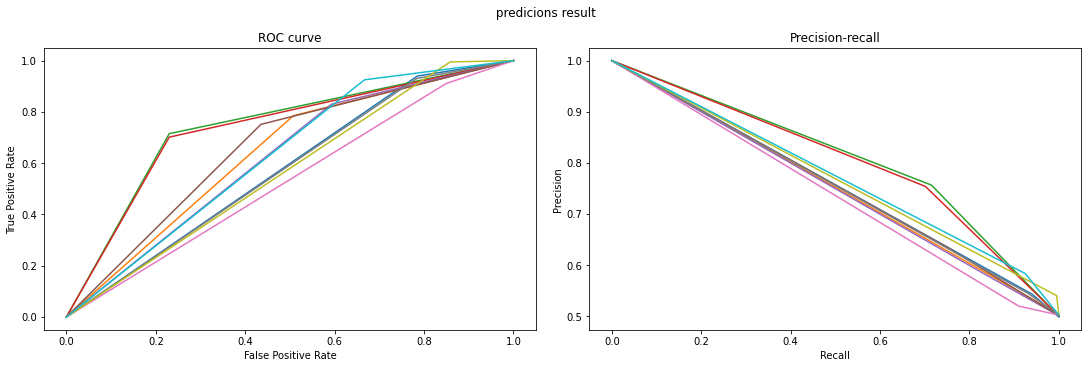

In [41]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), constrained_layout=True,)

_ = fig.suptitle(f'{PATH_models.split("/")[-1]} predicions result')

_ = ax1.set_title('ROC curve')
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')

_ = ax2.set_title('Precision-recall')
_ = ax2.set_xlabel('Recall')
_ = ax2.set_ylabel('Precision')

for fold in folds:
    model_n = fold.split('_')[-1]
    
    with open(f'{PATH_models}/{fold}/results/lung_model_{model_n}_real_pred.pickle', "rb") as pk:
        real_pred = pickle.load(pk)
    
    real = real_pred[0]
    pred = real_pred[1]
    
    fpr_th, tpr_th, _ = roc_curve(real, pred)
    AUC_ROC = round(auc(fpr_th, tpr_th), 3)
    
    precision_th, recall_th, _ = precision_recall_curve(real, pred)
    PR_AUC = round(auc(recall_th, precision_th),3)
    
    _ = ax1.plot(fpr_th, tpr_th)
    _ = ax2.plot(recall_th, precision_th)
    
    print (pred)
    print (real)
    print (AUC_ROC)
    print (PR_AUC)
    print (recall_th)
    print (precision_th)
    
    print ()
    
    

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), constrained_layout=True,)

_ = fig.suptitle(f'{name} predicions result')

_ = ax1.set_title('ROC curve')
_ = ax1.plot(fpr_th, tpr_th)
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')


_ = ax2.set_title('Precision-recall')
_ = ax2.plot(recall_th, precision_th)
_ = ax2.set_xlabel('Recall')
_ = ax2.set_ylabel('Precision')


plt.savefig(f'{name}_predictions_result.png')

In [43]:
from keras.models import load_model

Using TensorFlow backend.


In [44]:
model = load_model('../results/lung/lung_model_1/results/lung_model_1_model.h5')

In [ ]:
model.